# Fishbone Training

In [1]:
import math
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow.keras as keras

from PIL import Image
from scipy import misc
from skimage import io,data,color
from tensorflow.keras import Input
from random import sample, choices
from skimage.transform import resize
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,BatchNormalization
%matplotlib inline

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
data = pd.read_csv('Datng.csv')
data_train,data_test=train_test_split(data,test_size=0.095,random_state=2,shuffle=False)

In [5]:
train_input = data_train.iloc[:,7:44]
train_output=data_train.iloc[:,0:7]
scaler_input =MinMaxScaler(feature_range=(0, 1))
train_input = scaler_input.fit_transform(train_input)
scaler_output =MinMaxScaler(feature_range=(0, 1))
train_output = scaler_output.fit_transform(train_output)

test_input = data_test.iloc[:,7:44]
test_output = data_test.iloc[:,0:7]
test_input = scaler_input.transform(test_input)
test_output = scaler_output.transform(test_output)
#test_input

In [8]:
#MLP build
model = keras.models.Sequential()
#model.add(Dropout(0.1,input_shape=(2,)))
model.add(Input(shape=(37,),batch_size=None,tensor=None))
model.add(BatchNormalization(axis=-1))
model.add(Dense(64))#,activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(128))
model.add(BatchNormalization(axis=-1))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(256))
model.add(BatchNormalization(axis=-1))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(600))
model.add(BatchNormalization(axis=-1))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(0.1))
model.add(Dense(1200))
model.add(BatchNormalization(axis=-1))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(0.2))
model.add(Dense(600))
model.add(BatchNormalization(axis=-1))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(0.1))
model.add(Dense(256))
model.add(BatchNormalization(axis=-1))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(0.1))
model.add(Dense(128))
model.add(BatchNormalization(axis=-1))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(64))
model.add(BatchNormalization(axis=-1))
model.add(LeakyReLU(alpha=0.05))
#model.add(Dropout(0.1))
model.add(Dense(7, activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_10 (Batc (None, 37)                148       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2432      
_________________________________________________________________
batch_normalization_11 (Batc (None, 64)                256       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 128)              

In [9]:
learning=0.0001
#keras.optimizers.Adam(lr=learning)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning),#keras.optimizers.Adam(learning_rate = 0.01),
              loss='mse')#,metrics=['mae','accuracy'])#,  #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #metrics=['accuracy'])
#train:
#batch_size=20
history = model.fit(train_input,train_output,epochs=400,validation_data=(test_input,test_output))

Epoch 1/400
2331/2331 [==============================] - 42s 18ms/step - loss: 0.1121 - val_loss: 0.0723
Epoch 2/400
2331/2331 [==============================] - 41s 17ms/step - loss: 0.0603 - val_loss: 0.0471
Epoch 3/400
2331/2331 [==============================] - 41s 18ms/step - loss: 0.0509 - val_loss: 0.0431
Epoch 4/400
2331/2331 [==============================] - 41s 17ms/step - loss: 0.0467 - val_loss: 0.0379
Epoch 5/400
2331/2331 [==============================] - 41s 18ms/step - loss: 0.0438 - val_loss: 0.0360
Epoch 6/400
2331/2331 [==============================] - 41s 18ms/step - loss: 0.0417 - val_loss: 0.0344
Epoch 7/400
2331/2331 [==============================] - 41s 18ms/step - loss: 0.0403 - val_loss: 0.0345
Epoch 8/400
2331/2331 [==============================] - 40s 17ms/step - loss: 0.0392 - val_loss: 0.0324
Epoch 9/400
2331/2331 [==============================] - 39s 17ms/step - loss: 0.0381 - val_loss: 0.0310
Epoch 10/400
2331/2331 [==============================]

Epoch 155/400
2331/2331 [==============================] - 41s 18ms/step - loss: 0.0214 - val_loss: 0.0237
Epoch 156/400
2331/2331 [==============================] - 41s 17ms/step - loss: 0.0215 - val_loss: 0.0226
Epoch 157/400
2331/2331 [==============================] - 40s 17ms/step - loss: 0.0215 - val_loss: 0.0252
Epoch 158/400
2331/2331 [==============================] - 40s 17ms/step - loss: 0.0214 - val_loss: 0.0222
Epoch 159/400
2331/2331 [==============================] - 40s 17ms/step - loss: 0.0213 - val_loss: 0.0256
Epoch 160/400
2331/2331 [==============================] - 40s 17ms/step - loss: 0.0214 - val_loss: 0.0247
Epoch 161/400
2331/2331 [==============================] - 40s 17ms/step - loss: 0.0213 - val_loss: 0.0219
Epoch 162/400
2331/2331 [==============================] - 40s 17ms/step - loss: 0.0214 - val_loss: 0.0249
Epoch 163/400
2331/2331 [==============================] - 40s 17ms/step - loss: 0.0213 - val_loss: 0.0233
Epoch 164/400
2331/2331 [============

2331/2331 [==============================] - 40s 17ms/step - loss: 0.0190 - val_loss: 0.0248
Epoch 308/400
2331/2331 [==============================] - 40s 17ms/step - loss: 0.0190 - val_loss: 0.0263
Epoch 309/400
2331/2331 [==============================] - 40s 17ms/step - loss: 0.0191 - val_loss: 0.0265
Epoch 310/400
2331/2331 [==============================] - 40s 17ms/step - loss: 0.0190 - val_loss: 0.0271
Epoch 311/400
2331/2331 [==============================] - 40s 17ms/step - loss: 0.0189 - val_loss: 0.0269
Epoch 312/400
2331/2331 [==============================] - 40s 17ms/step - loss: 0.0191 - val_loss: 0.0261
Epoch 313/400
2331/2331 [==============================] - 40s 17ms/step - loss: 0.0190 - val_loss: 0.0261
Epoch 314/400
2331/2331 [==============================] - 40s 17ms/step - loss: 0.0189 - val_loss: 0.0262
Epoch 315/400
2331/2331 [==============================] - 40s 17ms/step - loss: 0.0190 - val_loss: 0.0265
Epoch 316/400
2331/2331 [==========================

In [13]:
# acc = history.history['accuracy']
# val_acc=history.history['val_accuracy']
# plt.plot(history.epoch,acc)
# plt.plot(history.epoch,val_acc)

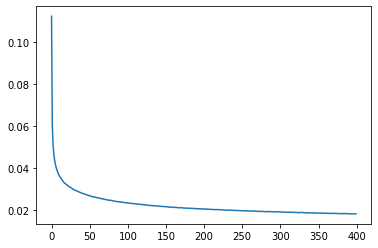

In [10]:
loss = history.history['loss'] 
plt.plot(history.epoch,loss)

In [11]:
model.save('model_1116Ex4.h5')

In [6]:
model = keras.models.load_model('model_1116Ex4.h5')

In [442]:
test = test_input[[1146]] #任取测试集，分析误差
test

array([[4.07473842e-05, 7.78185819e-03, 2.86161669e-03, 7.87144362e-04,
        3.74395436e-03, 9.00463074e-03, 1.76173997e-03, 4.34853888e-04,
        2.75854620e-04, 7.71771478e-04, 9.39777088e-04, 9.18293959e-04,
        9.57218473e-04, 1.40147182e-03, 1.56123251e-03, 3.30014604e-03,
        9.44280930e-03, 9.81350076e-02, 6.10189294e-02, 2.61331142e-02,
        1.19002741e-02, 1.41624257e-03, 3.61238358e-04, 2.06590991e-04,
        1.97317219e-04, 5.74338192e-04, 2.12031222e-03, 3.03154327e-03,
        1.84180452e-02, 3.13045767e-02, 2.87217198e-02, 2.40775382e-02,
        2.34617590e-02, 1.46617225e-02, 5.94396482e-03, 2.11425285e-03,
        7.44825701e-05]])

In [443]:
masaka = scaler_input.inverse_transform(test)#反归一化
masaka

array([[  5.06388818,   5.13096796,   5.28186084,   5.47536107,
          5.79442666,  10.10450075,   6.21858559,   3.33449564,
          3.24326508,   3.29144685,   3.36658218,   3.46553405,
          3.59415722,   3.76347303,   3.99128327,   4.8557728 ,
         11.23797176,  43.36236754,  18.89956985,  12.28604295,
          9.54810067,   8.2954203 ,   7.80177604,   7.80243347,
          8.22173503,  14.97085389,  92.90004751, 144.6678529 ,
         87.45561627,  62.5253451 ,  51.35168643,  47.34233649,
         48.63451647,  56.30766508,  76.98483399, 147.7934439 ,
        296.8617472 ]])

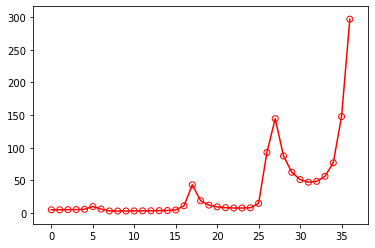

In [444]:
plt.plot(range(37),masaka.T, c='r', linewidth = 1.5) 
plt.scatter(range(37),masaka.T,color='red',facecolors='none')

In [446]:
test_outpt = model.predict(test)#用这个输入MPB第1999行0.057
test_outpt = scaler_output.inverse_transform(test_outpt)
test_outpt

array([[0.6338431, 1.8575878, 0.8704723, 1.7492487, 0.4953474, 0.7982952,
        0.7305161]], dtype=float32)

In [69]:
zzz =[[#MPB-PWE预测值
5.544727534290776,
 5.795155200360851,
 6.533570932290315,
 8.17089838553233,
 13.806207699214548,
 23.323674648764843,
 11.73544333031081,
 6.577452797300713,
 5.259187948554929,
 4.846468627681988,
 4.767195397155925,
 4.858442109092531,
 5.071340355867812,
 5.399509829645673,
 5.859078546541697,
 6.484398993946939,
 7.32963101299392,
 8.473453971670223,
 10.024460513883549,
 12.119655645027288,
 14.90059564303417,
 18.431868394235458,
 22.525981879894772,
 26.55027164620336,
 29.527382641560482,
 30.77580567959828,
 30.47676297842365,
 29.425861429842737,
 28.43156599598477,
 28.047675299148658,
 28.66726184299277,
 30.73700057767472,
 35.089418554395465,
 43.73738060784772,
 62.97062160472485,
 126.18796786340702,
 266.12191954112296]]
kkk = scaler_input.transform(zzz)
kkk
#test_output=model.predict(test)

array([[5.03922343e-05, 1.03375530e-02, 4.47683710e-03, 1.66031929e-03,
        1.44677686e-02, 2.58083473e-02, 4.78268394e-03, 4.83703886e-03,
        2.77077891e-03, 5.50818757e-03, 5.31248647e-03, 4.40893918e-03,
        3.92232021e-03, 5.27379305e-03, 5.43565267e-03, 6.81007250e-03,
        4.72659059e-03, 1.23405848e-02, 2.58335797e-02, 2.56340811e-02,
        2.27632742e-02, 5.43911194e-03, 1.99013188e-03, 1.30602582e-03,
        1.27683710e-03, 1.44224503e-03, 6.19307727e-04, 5.27218384e-04,
        5.14382434e-03, 1.23447320e-02, 1.44162498e-02, 1.43449034e-02,
        1.58786268e-02, 1.09419306e-02, 4.75949813e-03, 1.78920926e-03,
        6.65780281e-05]])

In [14]:
test_output=model.predict(test_input)
test_output

array([[0.864429  , 0.50704575, 0.30201396, 0.17498128, 0.18316811,
        0.36598602, 0.353425  ]], dtype=float32)

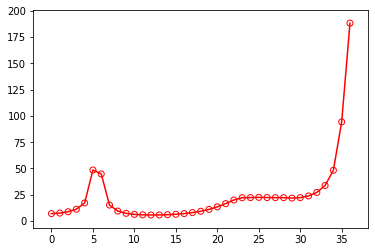

In [447]:
Ylabel = np.linspace(0.36,0.5,35)#任取flatband值，效果一般
test=[[
 7.015142959931643,
 7.468739244679099,
 8.749433939780419,
 11.173992670353671,
 17.129431872816784,
 48.46814303996599,
 44.73250526558919,
 15.097133943578367,
 9.413178154606172,
 7.244914738937014,
 6.251940859823916,
 5.79761043910132,
 5.647364106548307,
 5.706504636159454,
 5.943480350649154,
 6.363563920497349,
 7.0007894518577185,
 7.917992737609578,
 9.209384545215938,
 10.997644540390937,
 13.406058040339417,
 16.466619652582207,
 19.93119732088853,
 22.099362292505877,
 22.2454408757638,
 22.450200618241495,
 22.258548889229238,
 22.182454161351224,
 22.156973526307066,
 21.74400307965494,
 22.181469192081114,
 23.77031018007065,
 27.119396419758587,
 33.72669964802024,
 48.22515725554095,
 94.24614933561026,
 188.25439840725213]]
#90.6900772028623,
#95.24375862425778,
#87.6900772028623,
 #92.24375862425778,
test = np.array(test)
Nglabel = [420/i for i in Ylabel]
plt.plot(range(37),test.T, c='r', linewidth = 1.5) 
plt.scatter(range(37),test.T,color='red',facecolors='none')

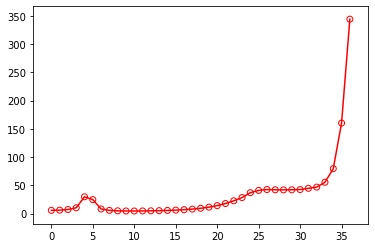

In [11]:
Ylabel = np.linspace(0.36,0.5,35)#36.475 4.6nm [0.7107381 , 1.8285599 , 0.8279799 , 1.6651961 , 0.49998197, 0.80103946, 0.66822004]
test=[[
 5.711860621974599,
 6.071101033940048,
 7.229372248884016,
 10.333868099143334,
 29.73502479617847,
 24.739668011951764,
 8.192726987027841,
 5.697119309376463,
 4.848877182223585,
 4.585677143919156,
 4.5568975574356365,
 4.658080449501095,
 4.858734500060684,
 5.158147740707297,
 5.57315509182068,
 6.136279742595543,
 6.898809450079844,
 7.937642329563947,
 9.36533657432666,
 11.340486363758165,
 14.07357084844172,
 17.798816037659495,
 22.649473650341854,
 28.374086620047468,
 37.00061668685353,
 41.041804415654646,
 42.60188818896393,
 42.163232818487764,
 41.983208797744055,
 42.18499633232846,
 42.545007095173446,
 44.746997306267254,
 46.87268649832911,
 55.47199254500767,
 79.54186477873526,
 160.2209885276217,
 344.28612108516484]]

test = np.array(test)
Nglabel = [420/i for i in Ylabel]
plt.plot(range(37),test.T, c='r', linewidth = 1.5) 
plt.scatter(range(37),test.T,color='red',facecolors='none')

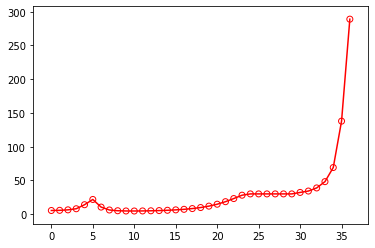

In [80]:
Ylabel = np.linspace(0.36,0.5,35)
test=[[
 5.421846824272049,
 5.6622881342229,
 6.378302071215922,
 8.01005334919671,
 13.98414250652828,
 21.77018863602736,
 10.469909252035698,
 6.16921202886272,
 5.052253746983046,
 4.711942872095299,
 4.661200499006416,
 4.76183465340548,
 4.973599577764172,
 5.293285461765775,
 5.738034977429429,
 6.342307864981365,
 7.160700342604305,
 8.27377852956908,
 9.796778194407713,
 11.885778580779274,
 14.72796399711232,
 18.481967151676255,
 23.108220741812566,
 28.082892487510403,
 30,
 30,
 30,
 30,
 30,
 30,
 32.17666223933219,
 34.24631825437648,
 38.84887411018731,
 48.17557543864682,
 69.07980206884747,
 137.84046989394875,
 288.95405341433036]]

test = np.array(test)
Nglabel = [420/i for i in Ylabel]
plt.plot(range(37),test.T, c='r', linewidth = 1.5) 
plt.scatter(range(37),test.T,color='red',facecolors='none')

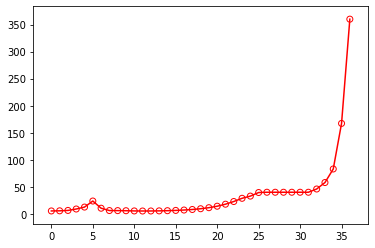

In [55]:
Ylabel = np.linspace(0.36,0.5,35)
test=[[ 5.421846824272049,
 5.6622881342229,
 6.378302071215922,
 9.01005334919671,
 12.58414250652828,
 23.77018863602736,
 10.469909252035698,
 6.16921202886272,
 6.0459208969723115,
 5.846608974184969,
 5.448596544855627,
 5.320940435452182,
 5.371524543231215,
 5.567239289453566,
 5.9068456000259175,
 6.412227085972868,
 7.128115712050021,
 8.127154091974278,
 9.519312871890081,
 11.463974419425266,
 14.177532059052691,
 17.912412129480956,
 22.848008944941004,
 28.808819494026476,
 32.879312891348086,
 39.4876009471172,
 40,
 40,
 40,
 40,
 40,
 40,
 46,
 57.955493157704616,
 83.01264197917527,
 167.2322616925533,
 359.95865329541664]]

test = np.array(test)
Nglabel = [420/i for i in Ylabel]
plt.plot(range(37),test.T, c='r', linewidth = 1.5) 
plt.scatter(range(37),test.T,color='red',facecolors='none')

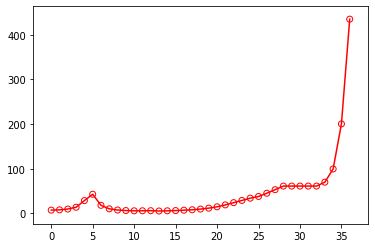

In [95]:
Ylabel = np.linspace(0.36,0.5,35)#固定平带ng为61，误差较大，预测40
test=[[7.145906905740436,
 7.741389663152135,
 9.556492912972665,
 13.605682904047958,
 28.456765902057157,
 42.73720988035909,
 17.880324998747177,
 10.04689334528263,
 7.384555383353653,
 6.193545327331062,
 5.580772755861585,
 5.669626981591669,
 5.86137360850941,
 5.155044985096578,
 5.567783054639589,
 6.1335197445430545,
 6.907058939487516,
 7.972937896117586,
 9.459422307550081,
 11.56020147709796,
 14.561346167022144,
 18.854854047523016,
 23.876605087403338,
 28.80484942387769,
 33.86558276650637,
 37.76721031115673,
 44.91623941693319,
 52.96898631736245,
 61,
 61,
 61,
 61,
 61,
 69.74368783111127,
 99.35080978866182,
 200.28154724961902,
 434.90695156223967]]

test = np.array(test)
Nglabel = [420/i for i in Ylabel]
plt.plot(range(37),test.T, c='r', linewidth = 1.5) 
plt.scatter(range(37),test.T,color='red',facecolors='none')

In [96]:
test_input=scaler_input.transform(test)#更新完test数组，再在此运行模型逆向预测
test_output=model.predict(test_input)
test_output=scaler_output.inverse_transform(test_output)
test_output

array([[0.8446889 , 1.7979954 , 0.82868385, 1.6576092 , 0.48902616,
        0.8174146 , 0.66575223]], dtype=float32)

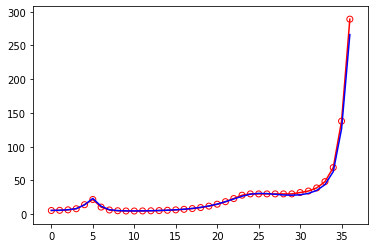

In [66]:
pre=[
 5.544522424370398,
 5.794902912790998,
 6.5331616551832274,
 8.170046143932293,
 13.802963297935584,
 23.323736355131505,
 11.737650460764575,
 6.5778279447501165,
 5.2592620219202795,
 4.846455712537029,
 4.767148114170914,
 4.858376458568206,
 5.0712622353367935,
 5.399422572297014,
 5.858986355082692,
 6.484310219902054,
 7.329562519374239,
 8.473449192744345,
 10.02458465175563,
 12.120044358626966,
 14.901532384208089,
 18.43377154753085,
 22.529378322034646,
 26.555480530398423,
 29.534035031956034,
 30.782812641249706,
 30.48306566410792,
 29.43097208797461,
 28.43551005617194,
 28.05069609627304,
 28.669628803412117,
 30.738943428541333,
 35.091128979695604,
 43.739047925651555,
 62.97251465999561,
 126.19067848246715,
 266.1242949955553]

plt.plot(range(37),test.T, c='r', linewidth = 1.5) 
plt.scatter(range(37),test.T,color='red',facecolors='none')
plt.plot(range(37),pre, c='b', linewidth = 1.5) 
#plt.scatter(range(37),pre,color='blue',facecolors='none')
#plt.ylim(0,200)